# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

Sprint 2

Author: Patrick Smith

Date: 24/03/2024

Contact: patrick.b.smith@gmail.com

## Forward

Introduction and figures for Britain
7.5% of people living in Britain were born abroad. (1)



|   |   |   |   |   |
|---|---|---|---|---|
| x | 1971  | 1981  | 1991  | 2001  |
| All People  | 52.6M  |  53.6M | 54.9M  |  57.1 |
| People born abroad   | 2.4M  |  2.8M | 3.2M | 4.3M  |
| % T  | 4.6%  | 5.1%  | 5.8%  | 7.6%  |




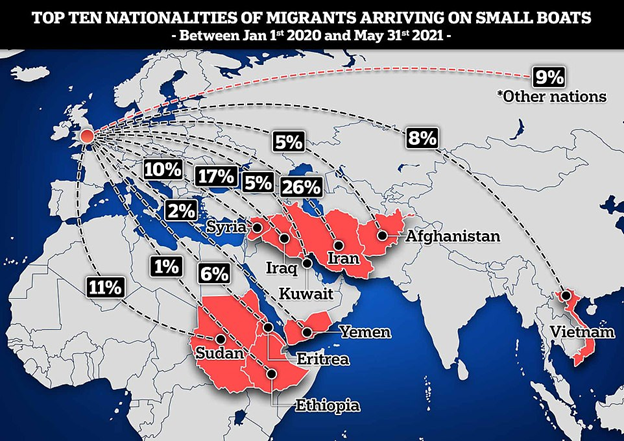


Article for Nov 2021 (2)

61% of Channel migrants come from Middle East including 26% from Iran alone

    Report by British Refugee Council outlined nationalities of Channel migrants who crossed from 2020 to 2021
    The majority of people to arrive in UK in small boats came from Middle Eastern nations such as Iran and Iraq
    The largest number came from Iran, while thousands of people came from Iraq, Syria, Kuwait and Yemen
    Around 8 per cent of arrivals from Vietnam, with 5 per cent from Afghanistan and 6 per cent from Eritrea





Source: (1): BBC, (2) DailyMail

## Table of Contents

[Inital Discovery/Problem Solving](#discovery)

[Data Manipulation](#wrangle)

[Initial Description](#Exploratory_Data_Analysis) 

[Discovery and Cleaning](#Discovery)

[Observation 1: Reviewer_Score](#Reviewer_Score)

[Observation 2: Average_Score](#Average_Score)

[Observation x: Case_Outcome](#Case_Outcome)

[Observation x: Decisions and Grants](#Decisions_Grants)

[Observation x: Return Type and Group](#Return_Type)

[Observation x: Applications](#Applications)

[Observation x: Host Country](#Host_Country)

[Observation x: Industry and Jobs](#Industry_Jobs)

[Observation x: Cases and Visas](#Cases)

[Observation x: Initital Conclusion and Forward](#EDA_Forward)

[EDA_Foward](#EDA_Foward)


## Description of Variables


| Column                     | Descriptor                                                                 | Datatype |
|----------------------------|----------------------------------------------------------------------------|----------|
| Year                       | Year of observation.                                                       | int32    |
| Quarter                    | Quarter of observation (Q1=1,Q2=2,Q3=3,Q4=4).                              | object   |
| Nationality                | Nationality of individual.                                                 | object   |
| Region                     | Region of observation.                                                     | object   |
| Return type group          | Type of return.                                                            | object   |
| Return type                | Specific type of return (details not initially provided, adding for consistency). | object   |
| Age                        | Age of individual, outputted in ranges (e.g., 18+).                       | object   |
| Sex                        | Gender of individual with values for male, female, and other/unknown.      | int32    |
| Return destination group   | Destination of return.                                                     | object   |
| Number of returns          | Count of returns.                                                          | float64  |
| Visa type group            | Type of visa the individual is applying to.                                | object   |
| Applicant type             | Type of applicant.                                                         | object   |
| Case outcome               | Outcome of case. This is the dependent variable. (Issued/Rejected/Withdrawal/Resettlement). | object   |
| Decisions                  | Number of decisions made.                                                  | float64  |
| Case type                  | Type of case.                                                              | object   |
| Case outcome group         | Group of case outcome.                                                     | object   |
| UASC                       | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child. Added for consistency. | object   |
| Host Country               | Country of host, similar to Nationality.                                   | object   |
| Application type group     | Type of application grouped.                                               | object   |
| Application type           | Type of application.                                                       | object   |
| Grants                     | Number of grants.                                                          | float64  |
| Location of application    | Location where the application was submitted. Added for completeness.      | object   |
| Applications               | Number of applications.                                                    | float64  |
| Occupation                 | Occupation of individual.                                                  | object   |
| Industry                   | Industry of individual.                                                    | object   |
| Occ. major group           | Major group classification of the occupation. Added for completeness.      | object   |
| Occ. sub-major group       | Sub-major group classification of the occupation. Added for completeness.  | object   |
| Occ. minor group           | Minor group classification of the occupation. Added for completeness.      | object   |
| Occ. unit group            | Unit group classification of the occupation. Added for completeness.       | object   |
| Sex_Male                   | Male dummy set to 1-0.                                                     | object   |
| Sex_Female                 | Female dummy set to 1-0.                                                   | object   |
| Sex_Other                  | Other or NAs dummy set to 1-0.                                             | object   |

# Defaults 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#get data then do .toclipboard() 
#then you can use for charts
#.plot(kind=bar", c="8eb7ff" ? you can do specific colours that you used in canva

## Initial Objective

We are going to complete the following:

1) Read the file
2) Do an initial investigation
3) Clean the data (data wrangling)
4) Do an EDA (exploratory data analysis)
5) Plots and univariate and bivariate distribution
6) Insights and conclusions to shareholders

After, we will move on to data preprocessing and modelling on the other notebook.

## Data Wrangling 

<a id = 'wrangle'><a/>

### Merging Pathway:
returns #1 -> entries #2 -> asylum #3-> grants #4 ->  
asylum_applications #5 -> applications_jobs #6  

From oldest read data to new 1-2-3-4-5-6, data is pasted on top, so it is 6-5-4-3-2-1 unfiltered.

Takes like 30 seconds - 1 minute to compute

In [3]:
# Define the directory path
directory_path = r"C:\Users\patri\Downloads\data"

# Define the file names
returns_file_name = "returns-clean.xlsx"
entries_file_name = "entries-clean.xlsx"
asylum_file_name = "Asylum initial decisions and resettlement-clean.xlsx"
grants_file_name = "Grants of British citizenship-clean.xlsx"
asylum_applications_file_name = "asylum-applications-clean.xlsx"
grants_jobs_file_name = "grants-occupactions-visas-clean.xlsx"
application_jobs_file_name = "applications-occupactions-visas-clean.xlsx"

# Construct the full file paths
returns_file_path = os.path.join(directory_path, returns_file_name)
entries_file_path = os.path.join(directory_path, entries_file_name)
asylum_file_path = os.path.join(directory_path, asylum_file_name)
grants_file_path = os.path.join(directory_path, grants_file_name)
asylum_applications_file_path = os.path.join(directory_path, asylum_applications_file_name)
grants_jobs_file_path = os.path.join(directory_path, grants_jobs_file_name)
application_jobs_file_path = os.path.join(directory_path, application_jobs_file_name)

# Read files and set df variables per sheet
# Specifying specific columns to ensure it pulls the right columns. Without this the combination df was getting multiples of the same columns.
# Picked most columns, decided to drop the non-important ones once the data is analyzed sufficently. 
df_returns = pd.read_excel(returns_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Return type group', 'Return type', 'Age', 'Sex', 'Return destination group', 'Number of returns'])
df_entries = pd.read_excel(entries_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type group', 'Applicant type', 'Case outcome', 'Decisions'])
df_asylum = pd.read_excel(asylum_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Case type', 'Case outcome group', 'Case outcome', 'Age', 'Sex', 'Applicant type', 'UASC', 'Host Country', 'Decisions'])
df_grants = pd.read_excel(grants_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Application type group', 'Application type', 'Region', 'Nationality', 'Sex', 'Age', 'Grants'])
df_asylum_applications = pd.read_excel(asylum_applications_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Age', 'Sex', 'Applicant type', 'UASC', 'Location of application', 'Applications'])
df_grants_jobs = pd.read_excel(grants_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Grants'])
df_application_jobs = pd.read_excel(application_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Applications'])

# Concatenate the dataframes along the rows axis
#Ignore_index is neccesary as the concatenation appeared to be giving different columns and rows based on combined indexes 
df_combined = pd.concat([df_returns, df_entries, df_asylum, df_grants, df_asylum_applications, df_grants_jobs, df_application_jobs], ignore_index=True)

# Sort the dataframe by 'Year' and 'Quarter'
# Almost all these values were populated in all the sheets so useful matching indicators
df_combined.sort_values(by=['Year', 'Quarter'], inplace=True)

# Display the resulting DataFrame
df_combined



,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
584636,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584637,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584638,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584639,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584640,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

#df_combined.to_csv('C:\Users\patri\Downloads\clean_df.csv', index=False)

## Inital Discovery and Cleaning

Let's check how much missing values we have in the data:


In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069269 entries, 584636 to 827858
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067885 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Sex                       549050 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            525835 non-null   object 
 12  Case outcome              456259 non-null   object 
 13  Decisions                 45

In [6]:
print(f"We have {df_combined.shape[0]} rows and {df_combined.shape[1]} columns with  string, floats and integers in our clean data.")

We have 1069269 rows and 29 columns with  string, floats and integers in our clean data.


Let's check for null or missing values. 
- Looks like Year, Quarter, Nationality, and Region are most populated and the least of our worries.
- The numerical data includes floats and integers.

Let's look at nulls. We know that there are nulls in all the columns, so we will now investigate how many nulls .

In [7]:
# displaying sum of na per collumn
df_combined.isna().sum(axis=0)

Year                          1384
Quarter                       1391
Nationality                   1391
Region                        1391
Return type group           831629
Return type                 831629
Age                         528190
Sex                         520219
Return destination group    831629
Number of returns           831629
Visa type group             722275
Applicant type              543434
Case outcome                613010
Decisions                   613010
Case type                   960004
Case outcome group          960004
UASC                        890428
Host Country                960004
Application type group      936696
Application type            944671
Grants                      852252
Location of application     999693
Applications                912307
Occupation                  897439
Industry                    897439
Occ. major group            897439
Occ. sub-major group        897439
Occ. minor group            897439
Occ. unit group     

First we can tackle quarter, nationality, and region because they have the same number of null sums, and year should be simple as well.

Let's check percentage of NA of shape of the whole df.

In [8]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.129434
Quarter                      0.130089
Nationality                  0.130089
Region                       0.130089
Return type group           77.775471
Return type                 77.775471
Age                         49.397299
Sex                         48.651836
Return destination group    77.775471
Number of returns           77.775471
Visa type group             67.548484
Applicant type              50.822945
Case outcome                57.329821
Decisions                   57.329821
Case type                   89.781337
Case outcome group          89.781337
UASC                        83.274461
Host Country                89.781337
Application type group      87.601530
Application type            88.347366
Grants                      79.704172
Location of application     93.493125
Applications                85.320626
Occupation                  83.930143
Industry                    83.930143
Occ. major group            83.930143
Occ. sub-maj

We can initially see that:

- The columns of 2nd priorty are: `Age`, `Sex`, and `Applicant type` because they have the lowest percentage of nulls, around 48-51%
- 3rd priority are: `Case outcome` and `Decisions`
- After we can look at the others and figure out if any could be combined or dropped
- It is likely that `Occupation`, `Industry`, and the 4 `Occ` columns could be, in some combination, combined, or dropped

First, let's check if there are any duplicates.

In [9]:
df_combined.duplicated().sum(axis=0)

45865

Displaying NULLS

In [10]:
# Filter rows where 'Year' column is null or NaN
df_combined[df_combined['Year'].isnull()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
826475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like there are a lot of rows we can drop that have no data. Maybe leftovers rows from the csvs that were combined

We can delete 1384 rows because they only have NaNs and no info

In [11]:
# Drop rows where either 'Year' or 'Quarter' column has NA
df_combined.dropna(subset=['Year', 'Quarter'], inplace=True)


In [12]:
df_combined.shape

(1067878, 29)

In [13]:
# Optionally, save the cleaned dataframe to a new CSV
#df_combined.to_csv('df_combined_v2.csv', index=False)

Let's check if there are any duplicates.

In [14]:
df_combined[df_combined.duplicated()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
237659,2005,2005 Q1,Afghanistan,Asia Central,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237683,2005,2005 Q1,Albania,Europe Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237727,2005,2005 Q1,Algeria,Africa North,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237730,2005,2005 Q1,Angola,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237795,2005,2005 Q1,Australia,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824039,2022,2022 Q4,Stateless,Other,NaN,NaN,NaN,F,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824041,2022,2022 Q4,Nigeria,Africa Sub-Saharan,NaN,NaN,NaN,M,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824042,2022,2022 Q4,Jamaica,America Central and South,NaN,NaN,NaN,F,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824044,2022,2022 Q4,Italy,EU 14,NaN,NaN,NaN,F,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print (f"there are {df_combined.duplicated().sum()} duplicates in the dataset")

there are 44477 duplicates in the dataset


Ok we have a lot. We can drop these.

In [16]:
df_combined = df_combined.drop_duplicates()

In [17]:
df_combined.head()

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
584636,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584637,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584638,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584639,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584640,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check if no duplicates now.

In [18]:
df_combined[df_combined.duplicated()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group


In [19]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.781438
Return type                 76.781438
Age                         47.132649
Sex                         46.367651
Return destination group    76.781438
Number of returns           76.781438
Visa type group             69.887561
Applicant type              52.413668
Case outcome                59.211590
Decisions                   59.211590
Case type                   89.324028
Case outcome group          89.324028
UASC                        82.526107
Host Country                89.324028
Application type group      87.059716
Application type            87.825105
Grants                      79.069690
Location of application     93.202078
Applications                84.937283
Occupation                  83.745179
Industry                    83.745179
Occ. major group            83.745179
Occ. sub-maj

Let's look at quarter now. It's a year and a letter (Q), so let's map this into 1, 2, 3, 4

In [20]:
df_combined['Quarter'].value_counts()

Quarter
2023 Q3    31466
2022 Q3    31063
2023 Q2    29300
2022 Q4    29298
2023 Q1    28938
           ...  
2003 Q3     1017
2001 Q1      868
2001 Q2      783
2001 Q3      774
2001 Q4      762
Name: count, Length: 91, dtype: int64

In [21]:
# Split the 'Quarter' column into 'Year' and 'Quarter' parts
df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)

# Map the 'Quarter' part to the desired values
quarter_mapping = {'1': 1, '2': 2, '3': 3, '4': 4}
#df_combined['Quarter'] = df_combined['Quarter'].map(quarter_mapping).fillna(5).astype(int)

C:\Users\patri\AppData\Local\Temp\ipykernel_9232\953793595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)


In [22]:
df_combined.sample(5)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
945240,2022,3,United States,America North,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,3231 - Youth and community workers,Education,Associate Professional and Technical Occupations,Health and Social Care Associate Professionals,Welfare and Housing Associate Professionals,Youth and community workers
19514,2005,4,United States,America North,Refused entry at port and subsequently departed,N/A - pre-2007,17 and under,Male,Home country,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320485,2009,3,Russia,Europe Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303562,2008,4,Mongolia,Asia East,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038467,2022,4,United States,America North,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,7130 - Sales supervisors,Wholesale and retail trade; repair of motor ve...,Sales and Customer Service Occupations,Sales Occupations,Sales Supervisors,Sales supervisors


In [23]:
# Convert 'Year' and 'Quarter' to integers, handling missing values by filling with a placeholder or dropping them
df_combined['Year'] = pd.to_numeric(df_combined['Year'], errors='coerce').fillna(0).astype(int)
df_combined['Quarter'] = pd.to_numeric(df_combined['Quarter'], errors='coerce').fillna(0).astype(int)

C:\Users\patri\AppData\Local\Temp\ipykernel_9232\1872588105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Year'] = pd.to_numeric(df_combined['Year'], errors='coerce').fillna(0).astype(int)
C:\Users\patri\AppData\Local\Temp\ipykernel_9232\1872588105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Quarter'] = pd.to_numeric(df_combined['Quarter'], errors='coerce').fillna(0).astype(int)


In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023401 entries, 584636 to 824045
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1023401 non-null  int32  
 1   Quarter                   1023401 non-null  int32  
 2   Nationality               1023401 non-null  object 
 3   Region                    1023401 non-null  object 
 4   Return type group         237619 non-null   object 
 5   Return type               237619 non-null   object 
 6   Age                       541045 non-null   object 
 7   Sex                       548874 non-null   object 
 8   Return destination group  237619 non-null   object 
 9   Number of returns         237619 non-null   float64
 10  Visa type group           308171 non-null   object 
 11  Applicant type            486999 non-null   object 
 12  Case outcome              417429 non-null   object 
 13  Decisions                 41

OK lets look at nationality and region now.

In [25]:
df_combined['Nationality'].value_counts()

Nationality
India                                                     34506
Pakistan                                                  25440
United States                                             23357
Nigeria                                                   22238
China                                                     21054
                                                          ...  
St Pierre and Miquelon (French)                               1
Svalbard and Jan Mayen Islands (Norwegian)                    1
Tokelau (New Zealand)                                         1
New Caledonia (French)                                        1
South Georgia and the South Sandwich Islands (British)        1
Name: count, Length: 239, dtype: int64

Checking for uniques

In [26]:
df_combined['Nationality'].nunique()

239

This is fine for now. Perhaps we could combine smaller countries together or drop the smaller ones later.

In [27]:
df_combined['Region'].value_counts()

Region
Africa Sub-Saharan           224847
America Central and South    114154
Europe Other                 103323
Asia South                   101307
Middle East                   93293
EU 14                         65234
Asia South East               63052
Asia East                     57294
Africa North                  52713
America North                 35796
Asia Central                  28940
Oceania                       24121
EU 8                          23245
Other                         17764
EU 2                          11871
EU Other                       6447
Name: count, dtype: int64

All these have value other than 'other', which could mean anything. However, we will just leave for now and compress to more general regions, like Africa, Central & South America, Europe, Asia, Africa, Oceana, and Other

In [28]:
# Define the mapping from specific regions to general regions
region_mapping = {
    'Africa Sub-Saharan': 'Africa',
    'America Central and South': 'America',
    'Europe Other': 'Europe',
    'Asia South': 'Asia',
    'Middle East': 'Middle East',
    'EU 14': 'Europe',
    'Asia South East': 'Asia',
    'Asia East': 'Asia',
    'Africa North': 'Africa',
    'America North': 'America',
    'Asia Central': 'Asia',
    'Oceania': 'Oceania',
    'EU 8': 'Europe',
    'Other': 'Other',
    'EU 2': 'Europe',
    'EU Other': 'Europe'
}


In [29]:

# Apply the mapping to the 'Region' column
df_combined['General_Region'] = df_combined['Region'].map(region_mapping)

# Check the new distribution of general regions
print(df_combined['General_Region'].value_counts())


General_Region
Africa         277560
Asia           250593
Europe         210120
America        149950
Middle East     93293
Oceania         24121
Other           17764
Name: count, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_9232\704495986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['General_Region'] = df_combined['Region'].map(region_mapping)


In [30]:
# Check the new distribution of general regions
df_combined['General_Region'].value_counts()

General_Region
Africa         277560
Asia           250593
Europe         210120
America        149950
Middle East     93293
Oceania         24121
Other           17764
Name: count, dtype: int64

In [31]:
df_combined['Sex'].value_counts()

Sex
Male                                 276820
Female                               233945
Total (pre-2009)                      30703
Unknown                                5172
Unknown Sex                            1054
M                                       574
F                                       572
Unknown / Not Given                      24
U                                         7
Data Unavailable in Source System         2
Male                                      1
Name: count, dtype: int64

In [32]:
# Standardize 'Sex' column to lowercase and strip whitespace
df_combined.loc[:, 'Sex'] = df_combined['Sex'].str.lower().str.strip()

# Replace variations with standard terms using loc
df_combined.loc[:, 'Sex'] = df_combined['Sex'].replace({
    'm': 'male',
    'f': 'female',
    'total (pre-2009)': 'unknown',
    'unknown sex': 'unknown',
    'u': 'unknown',
    'unknown / not given': 'unknown',
    'data unavailable in source system': 'unknown'
})



In [33]:
# Define the mapping dictionary
sex_mapping = {
    'male': 1,
    'female': 2,
    'unknown': 3
}

# Apply the mapping
df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)

# It seems you've already handled NaN values with .fillna(3), which is great
df_combined['Sex'] = df_combined['Sex'].fillna(3).astype(int)


C:\Users\patri\AppData\Local\Temp\ipykernel_9232\2505959433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)
C:\Users\patri\AppData\Local\Temp\ipykernel_9232\2505959433.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Sex'] = df_combined['Sex'].fillna(3).astype(int)


In [34]:
df_combined['Sex'].value_counts()

Sex
3    511489
1    277395
2    234517
Name: count, dtype: int64

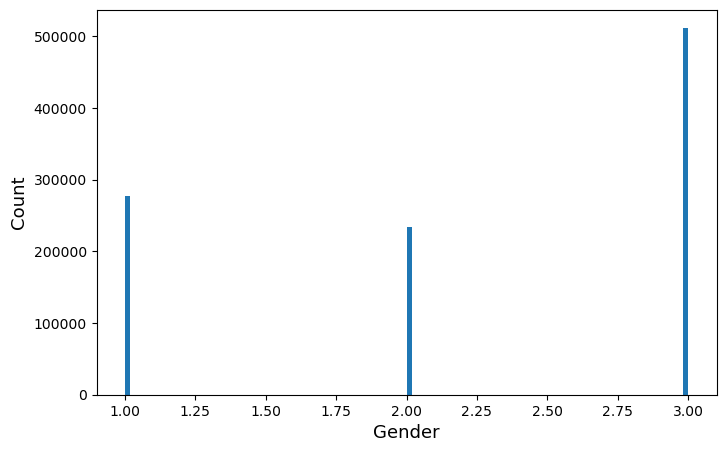

In [35]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Sex'], bins = 100 )
#plt.yscale('log')
plt.ylabel("Count", size=13)
plt.xlabel("Gender", size=13)
plt.show()

In [36]:
df_combined['Age'].value_counts()

Age
30 to 49            89101
30-49               85767
18 to 29            81653
18-29               76853
Under 18            59648
50-69               38959
50 to 69            34098
Total (pre-2009)    30703
17 and under        26160
70+                 11255
70 and over          6092
Unknown               695
Unknown Age            61
Name: count, dtype: int64

In [37]:
def standardize_age(age):
    if age in ["Under 18", "17 and under"]:
        return "Under 18"
    elif age in ["18 to 29", "18-29"]:
        return "18 to 29"
    elif age in ["30 to 49", "30-49"]:
        return "30 to 49"
    elif age in ["50 to 69", "50-69"]:
        return "50 to 69"
    elif age in ["70+", "70 and over"]:
        return "70+"
    elif age in ["Unknown", "Unknown Age", "Total (pre-2009)"]:
        return "Unknown"
    else:
        return "Unknown"  # Default case if the age doesn't match any known pattern

# Apply the function to the 'Age' column
df_combined['Age'] = df_combined['Age'].apply(standardize_age)


C:\Users\patri\AppData\Local\Temp\ipykernel_9232\3656643399.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Age'] = df_combined['Age'].apply(standardize_age)


In [38]:
df_combined['Age'].value_counts()

Age
Unknown     513815
30 to 49    174868
18 to 29    158506
Under 18     85808
50 to 69     73057
70+          17347
Name: count, dtype: int64

In [39]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

#REF: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas


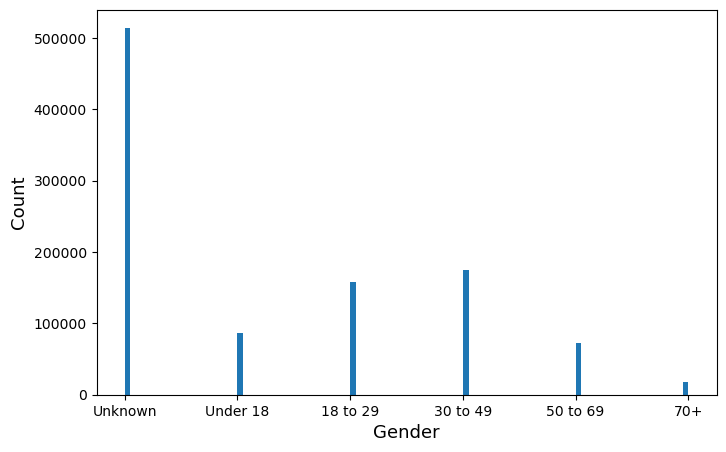

In [40]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Age'], bins = 100 )
#plt.yscale('log')
plt.ylabel("Count", size=13)
plt.xlabel("Gender", size=13)
plt.show()

Follows a normal distribution

In [41]:
# Filter rows where 'Age' is 'Unknown'
age_unknown_df = df_combined[df_combined['Age'] == "Unknown"]

# Inspect the number of rows where 'Age' is 'Unknown'
print("Number of rows with 'Age' as 'Unknown':", age_unknown_df.shape[0])

# Inspect the first few rows to understand their characteristics
age_unknown_df.head()

Number of rows with 'Age' as 'Unknown': 513815


,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
584636,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
584637,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
584638,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
584639,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
584640,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


We can further refine it later.

Now let's look at case outcome, one of our main dependent variables.

In [42]:
df_combined['Case outcome'].value_counts()

Case outcome
Issued                                                                           174922
Refused                                                                           91014
Withdrawn                                                                         34256
Other Refusals                                                                    31929
Refugee Permission                                                                21704
Other Withdrawal                                                                  14759
Certified Refusal                                                                  9770
Lapsed                                                                             7979
3rd Country Refusal                                                                5738
Discretionary Leave                                                                5007
Non-Substantiated Withdrawal                                                       4193
Non-Compliance Refu

In [43]:
# Create a dictionary to map similar values to main categories
outcome_mapping = {
    'Refugee Permission': ['Refugee Permission', 'Temporary Refugee Permission'],
    'Issued': ['Issued', 'Humanitarian Protection'],
    'Refused': ['Refused', 'Certified Refusal', '3rd Country Refusal', 'Non-Compliance Refusal'],
    'Withdrawn': ['Withdrawn', 'Lapsed', 'Other Withdrawal', 'Non-Substantiated Withdrawal'],
    'Resettlements': [
        'Resettlement - Gateway Protection Programme',
        'Resettlement - UK Resettlement Scheme',
        'Resettlement - Vulnerable Children Resettlement Scheme',
        'Resettlement - Vulnerable Persons Resettlement Scheme',
        'Resettlement - Community Sponsorship Scheme',
        'Resettlement - Mandate Scheme',
        'Resettlement - ACRS Pathway 1 - Settled accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation',
        'Resettlement - ACRS Pathway 3 - Settled accommodation',
        'Relocation - ARAP - Settled accommodation',
        'Resettlement - ACRS Pathway 1 - Settled accommodation - Community Sponsorship',
        'Calais Leave',
        'Resettlement - Afghan route not recorded - Accommodation not recorded',
        'Resettlement - ACRS Pathway 3 - Interim accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation - Community Sponsorship',
        'Resettlement - Afghan route not recorded - Settled accommodation'
    ]
}


In [44]:
# Reverse the mapping for easier application
reverse_mapping = {}
for category, values in outcome_mapping.items():
    for value in values:
        reverse_mapping[value] = category

# Apply reverse mapping
df_combined['Case outcome'] = df_combined['Case outcome'].map(reverse_mapping)

# Assign 'Other' to any case outcome not covered by the categories
df_combined.loc[~df_combined['Case outcome'].isin(outcome_mapping.keys()), 'Case outcome'] = 'Unknown'


Leaving it set to Other.NA for now, but I'm considering changing it to something more sophisicated later.

In [45]:
df_combined['Case outcome'].value_counts()

Case outcome
Unknown               649340
Issued                177645
Refused               109818
Withdrawn              61187
Refugee Permission     21780
Resettlements           3631
Name: count, dtype: int64

In [46]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023401 entries, 584636 to 824045
Data columns (total 30 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1023401 non-null  int32  
 1   Quarter                   1023401 non-null  int32  
 2   Nationality               1023401 non-null  object 
 3   Region                    1023401 non-null  object 
 4   Return type group         237619 non-null   object 
 5   Return type               237619 non-null   object 
 6   Age                       1023401 non-null  object 
 7   Sex                       1023401 non-null  int32  
 8   Return destination group  237619 non-null   object 
 9   Number of returns         237619 non-null   float64
 10  Visa type group           308171 non-null   object 
 11  Applicant type            486999 non-null   object 
 12  Case outcome              1023401 non-null  object 
 13  Decisions                 41

<div id='Case_Outcome'></div>

### Notable Observation: Case Outcome

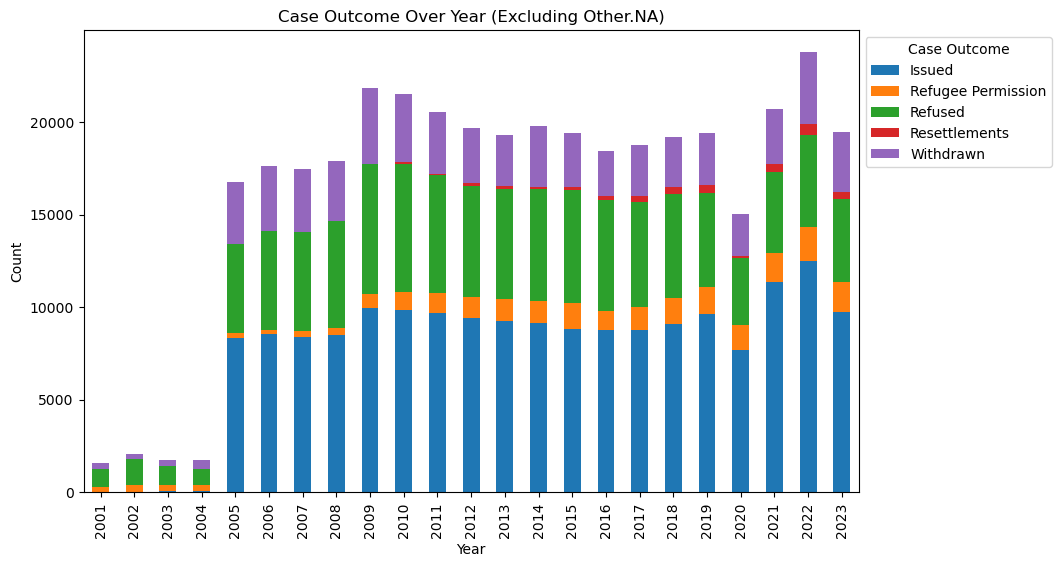

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df_combined

# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
filtered_df = df_combined[df_combined['Case outcome'] != 'Unknown']

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
outcome_counts = filtered_df.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Case Outcome Over Year (Excluding Other.NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

#normalize it / percentages / ratios

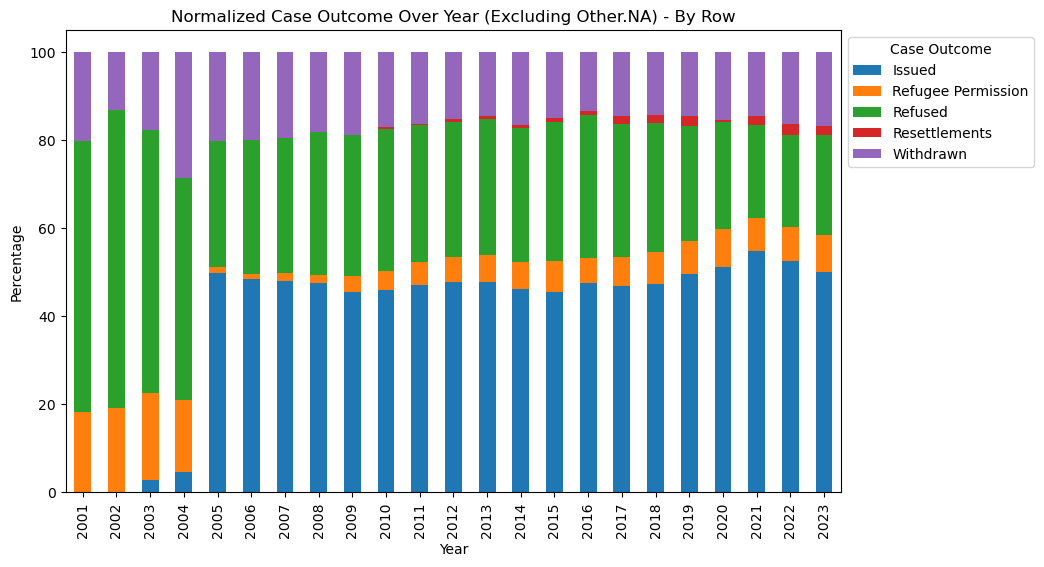

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df_combined

# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
filtered_df = df_combined[df_combined['Case outcome'] != 'Unknown']

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
outcome_counts = filtered_df.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Normalize by row (percentage of each year's total)
outcome_counts_norm_row = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Normalize by column (percentage of each case outcome's total)
outcome_counts_norm_col = outcome_counts.div(outcome_counts.sum(axis=0), axis=1) * 100

# Plot the normalized data
outcome_counts_norm_row.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Case Outcome Over Year (Excluding Other.NA) - By Row')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

There was a general election in 2005 where immigration was one of the main political discussions.

The tough stuff worked, in the sense that fewer people applied for asylum in 2004 than in any year since 1998 (whether the system had got any better at sifting genuine claims from false ones is less certain). Reduced numbers, in turn, meant a calmer electorate. Polls by MORI, a pollster, show that the proportion of Britons citing immigration and race as one of the two most important issues facing the nation declined gradually from a pre-campaign peak of 39% in May 2002 to 26% in January 2005. It then shot up again when Labour and the Tories unveiled their policies.


REF: https://www.encyclopedia.com/humanities/applied-and-social-sciences-magazines/uk-immigration-and-2005-general-election

In [49]:
df_combined['Case outcome group'].value_counts()

Case outcome group
Refused                 52123
Grant of Protection     28358
Withdrawn               19679
Grant of Other Leave     9098
Name: count, dtype: int64

In [50]:
# Define the list of known groups
known_groups = ['Refused', 'Grant of Protection', 'Withdrawn', 'Grant of Other Leave']

# Use `.where()` to keep the value if it's in known_groups, else replace with 'Unknown'
df_combined['Case outcome group'] = df_combined['Case outcome group'].where(df_combined['Case outcome group'].isin(known_groups), other='Unknown')


In [51]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.781438
Return type                 76.781438
Age                          0.000000
Sex                          0.000000
Return destination group    76.781438
Number of returns           76.781438
Visa type group             69.887561
Applicant type              52.413668
Case outcome                 0.000000
Decisions                   59.211590
Case type                   89.324028
Case outcome group           0.000000
UASC                        82.526107
Host Country                89.324028
Application type group      87.059716
Application type            87.825105
Grants                      79.069690
Location of application     93.202078
Applications                84.937283
Occupation                  83.745179
Industry                    83.745179
Occ. major group            83.745179
Occ. sub-maj

In [52]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023401 entries, 584636 to 824045
Data columns (total 30 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1023401 non-null  int32  
 1   Quarter                   1023401 non-null  int32  
 2   Nationality               1023401 non-null  object 
 3   Region                    1023401 non-null  object 
 4   Return type group         237619 non-null   object 
 5   Return type               237619 non-null   object 
 6   Age                       1023401 non-null  object 
 7   Sex                       1023401 non-null  int32  
 8   Return destination group  237619 non-null   object 
 9   Number of returns         237619 non-null   float64
 10  Visa type group           308171 non-null   object 
 11  Applicant type            486999 non-null   object 
 12  Case outcome              1023401 non-null  object 
 13  Decisions                 41

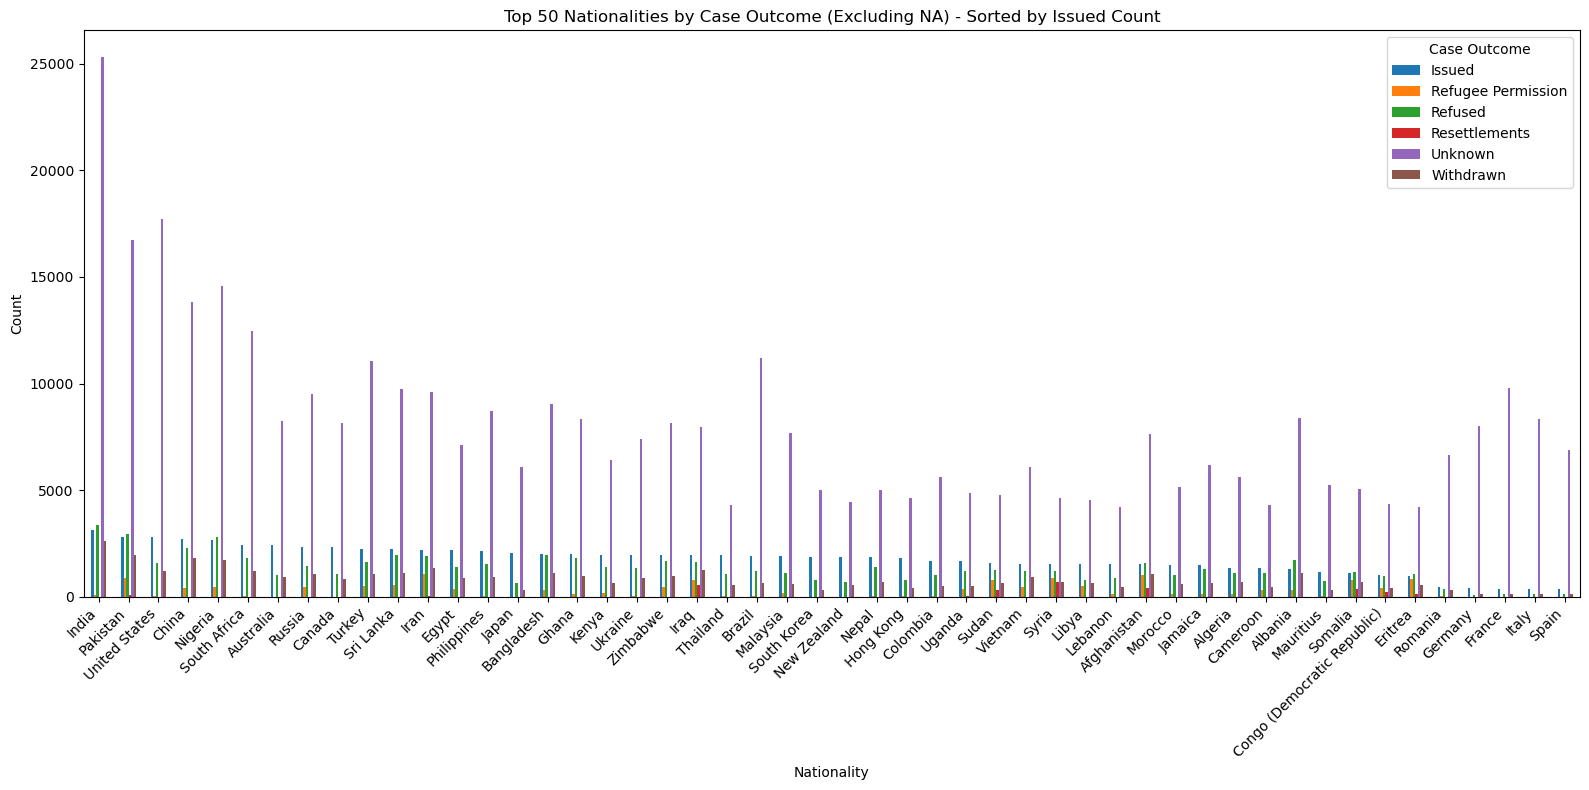

In [53]:

# Filter the dataframe to exclude rows where 'Case outcome' is 'NA'
filtered_df = df_combined[df_combined['Case outcome'] != 'Other.NA']

# Group filtered data by 'Nationality' and 'Case outcome' and count occurrences
grouped_counts = filtered_df.groupby(['Nationality', 'Case outcome']).size().unstack(fill_value=0)

# Get the top 50 nationalities by total count across all case outcomes
top_50_nationalities = grouped_counts.sum(axis=1).nlargest(50).index

# Filter the grouped counts dataframe to include only the top 50 nationalities
grouped_counts_top_50 = grouped_counts.loc[top_50_nationalities]

# Sort the data by the "Issued" count in descending order
grouped_counts_top_50_sorted = grouped_counts_top_50.sort_values(by='Issued', ascending=False)

# Plot the sorted data
grouped_counts_top_50_sorted.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Top 50 Nationalities by Case Outcome (Excluding NA) - Sorted by Issued Count')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


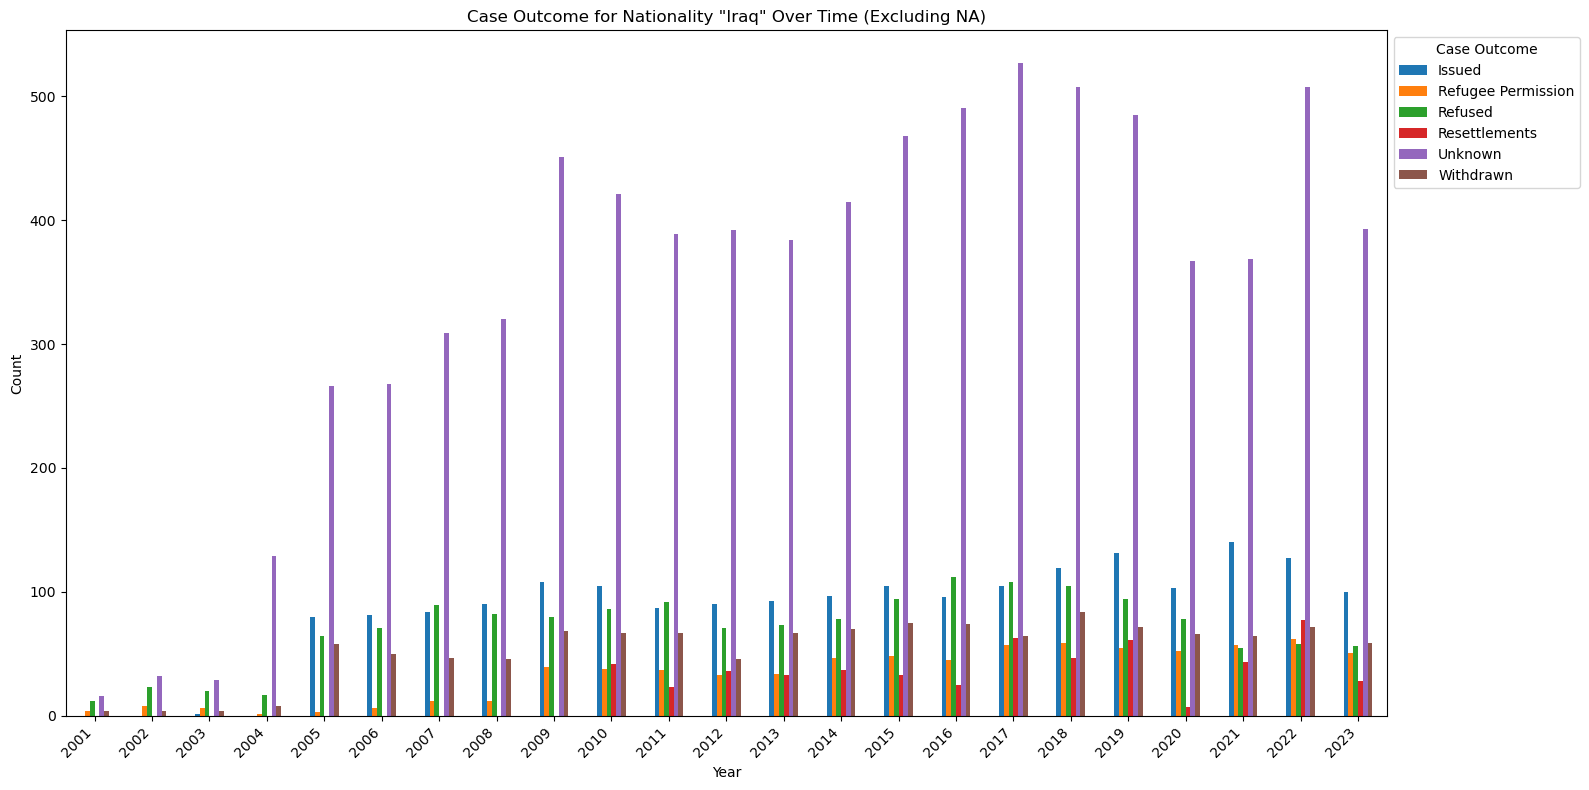

In [54]:
# Filter the dataframe to include only rows where 'Nationality' is 'Iraq' and 'Case outcome' is not 'Other.NA'
filtered_df_iraq = df_combined[(df_combined['Nationality'] == 'Iraq') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_iraq = filtered_df_iraq.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_iraq.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Iraq" Over Time (Excluding NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The Iraq War (Arabic: حرب العراق, romanized: ḥarb ālʿirāq) was a protracted armed conflict in Iraq from 2003 to 2011. It began with the invasion of Iraq by the United States-led coalition that overthrew the Ba'athist government of Saddam Hussein. The conflict continued for much of the next decade as an insurgency emerged to oppose the coalition forces and the post-invasion Iraqi government. US troops were officially withdrawn in 2011. 

REF: https://en.wikipedia.org/wiki/Iraq_War

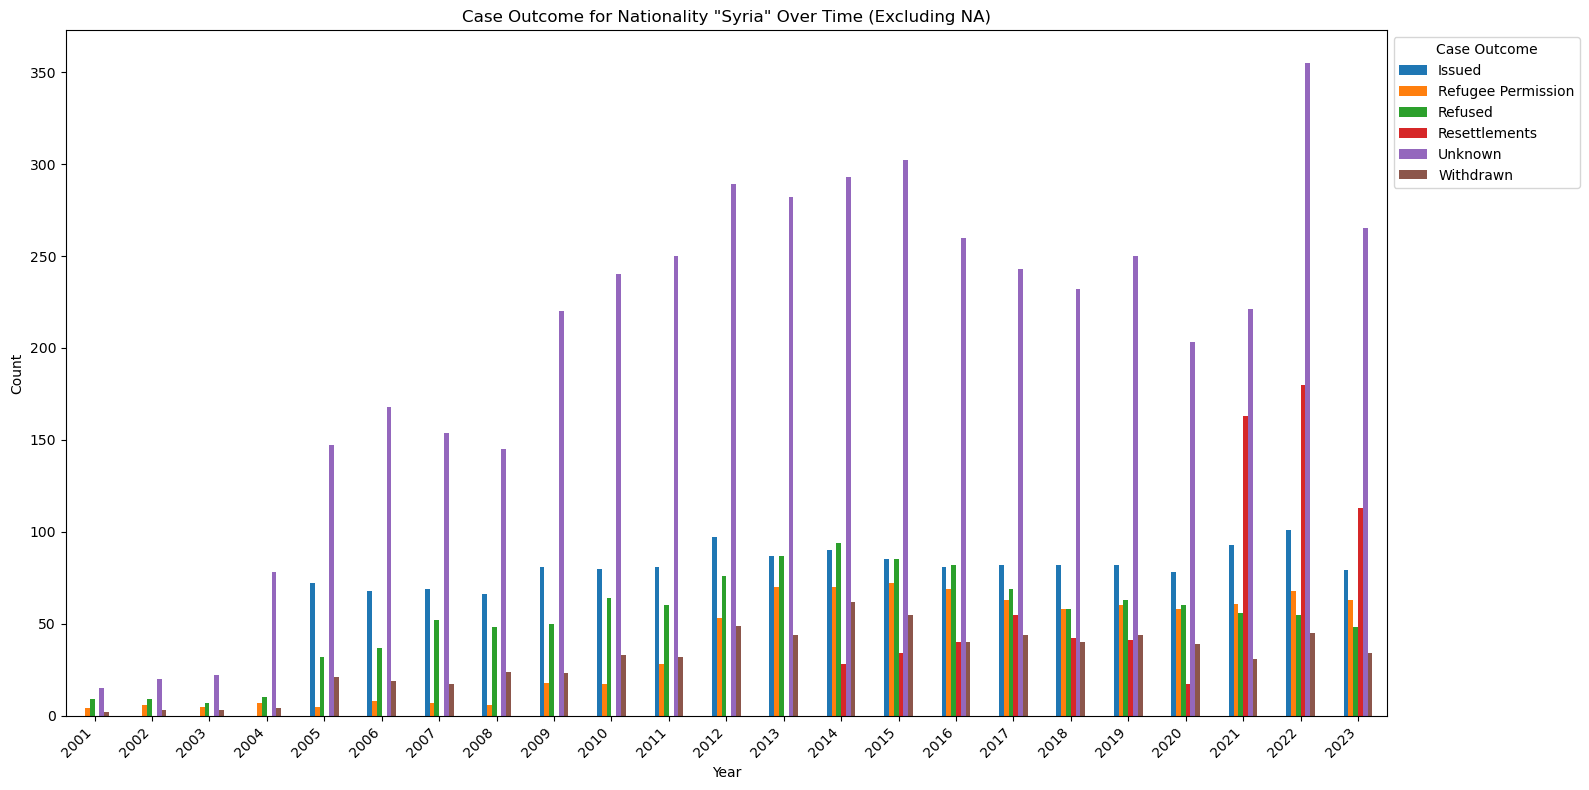

In [55]:
# Filter the dataframe to include only rows where 'Nationality' is 'Syria' and 'Case outcome' is not 'Other.NA'
filtered_df_syria = df_combined[(df_combined['Nationality'] == 'Syria') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_syria = filtered_df_syria.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_syria.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Syria" Over Time (Excluding NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The Syrian civil war (Arabic: ٱلْحَرْبُ ٱلْأَهْلِيَّةُ ٱلسُّورِيَّةُ, romanized: al-ḥarb al-ʾahlīyah al-sūrīyah) is an ongoing multi-sided conflict in Syria involving various state-sponsored and non-state actors. In March 2011, popular discontent with the rule of Bashar al-Assad triggered large-scale protests and pro-democracy rallies across Syria, as part of the wider Arab Spring protests in the region. After months of crackdown by governments security apparatus, various armed rebel groups such as the Free Syrian Army began forming across the country, marking the beginning of the Syrian insurgency. By mid-2012, the crisis had escalated into a full-blown civil war.

Receiving arms from NATO and GCC states, rebel forces initially made significant advances against the government forces, who were receiving arms from Iran and Russia. Rebels captured the regional capitals of Raqqa in 2013 and Idlib in 2015. Consequently, in September 2015, Russia launched a military intervention in support of the government, shifting the balance of the conflict. By late 2018, all rebel strongholds, except parts of Idlib region, had fallen to the government forces. 

REF: https://en.wikipedia.org/wiki/Syrian_civil_war

In [56]:
# Step 1: Filter the dataframe to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index

# Step 2: Iterates for top 50. Calculates counts for refused, withdrawn, issued, and refugee permission cases for each nationality
rejection_data = []
for nationality in top_50_nationalities:
    nationality_data = df_combined[df_combined['Nationality'] == nationality]
    refused_count = nationality_data[nationality_data['Case outcome'] == 'Refused'].shape[0]
    withdrawn_count = nationality_data[nationality_data['Case outcome'] == 'Withdrawn'].shape[0]
    issued_count = nationality_data[nationality_data['Case outcome'] == 'Issued'].shape[0]
    refugee_permission_count = nationality_data[nationality_data['Case outcome'] == 'Refugee Permission'].shape[0]
    
    # Step 3: Calculates total - issued + refugee permission 
    total_issued_refugee_permission = issued_count + refugee_permission_count

    # Step 4: Calculates total - total refused + withdrawn
    total_refused_withdrawn = refused_count + withdrawn_count
    
    # Step 5: Calculate the rejection ratio
    rejection_ratio = round((refused_count / total_issued_refugee_permission), 2)

    # Step 6: Calculate the total rejection ratio (including withdrawals)
    total_rejection_ratio = round((total_refused_withdrawn / total_issued_refugee_permission), 2)
    
    # Step 7: Append the data to the list
    rejection_data.append((nationality, refused_count, withdrawn_count, issued_count, refugee_permission_count, total_issued_refugee_permission, rejection_ratio, total_rejection_ratio))

# Display the results in a DataFrame
rejection_df = pd.DataFrame(rejection_data, columns=['Nationality', 'Refused', 'Withdrawn', 'Issued', 'Refugee Permission', 'Total Issued + Refugee Permission', 'Rejection Ratio', 'Total Rejection Ratio'])
print(rejection_df)


                    Nationality  Refused  Withdrawn  Issued  \
0                         India     3363       2618    3130   
1                      Pakistan     2962       1966    2805   
2                 United States     1586       1216    2794   
3                       Nigeria     2801       1727    2644   
4                         China     2303       1818    2715   
5                  South Africa     1815       1196    2443   
6                        Turkey     1646       1079    2251   
7                          Iran     1919       1345    2184   
8                     Sri Lanka     1956       1122    2238   
9                        Brazil     1216        655    1934   
10                       Russia     1454       1090    2350   
11                   Bangladesh     1981       1121    2006   
12                         Iraq     1618       1236    1942   
13                  Philippines     1536        933    2156   
14                  Afghanistan     1591       1088    

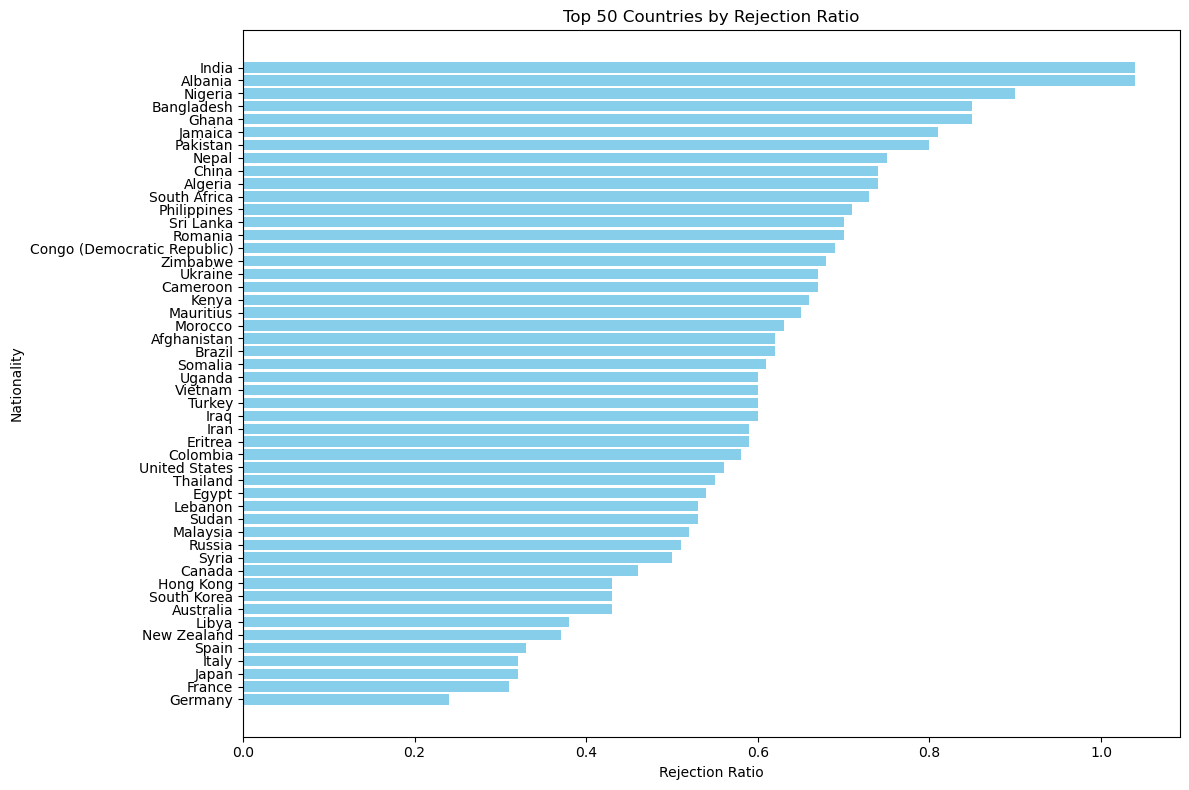

In [57]:
import matplotlib.pyplot as plt

# Sort the rejection data by rejection ratio in descending order
rejection_df_sorted = rejection_df.sort_values(by='Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Rejection Ratio'], color='skyblue')
plt.xlabel('Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rejection ratio at the top
plt.tight_layout()
plt.show()


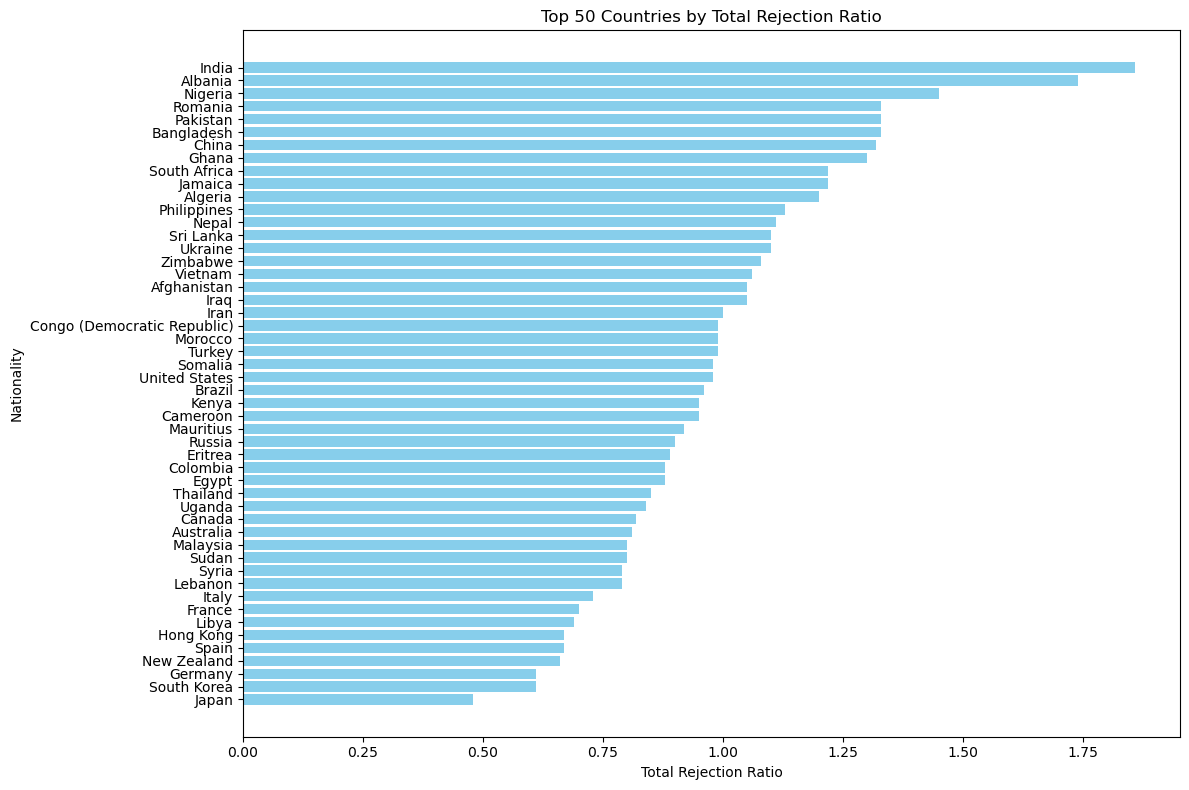

In [58]:
# Sort the rejection data by total rejection ratio in descending order
rejection_df_sorted = rejection_df.sort_values(by='Total Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Total Rejection Ratio'], color='skyblue')
plt.xlabel('Total Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Total Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest total rejection ratio at the top
plt.tight_layout()
plt.show()


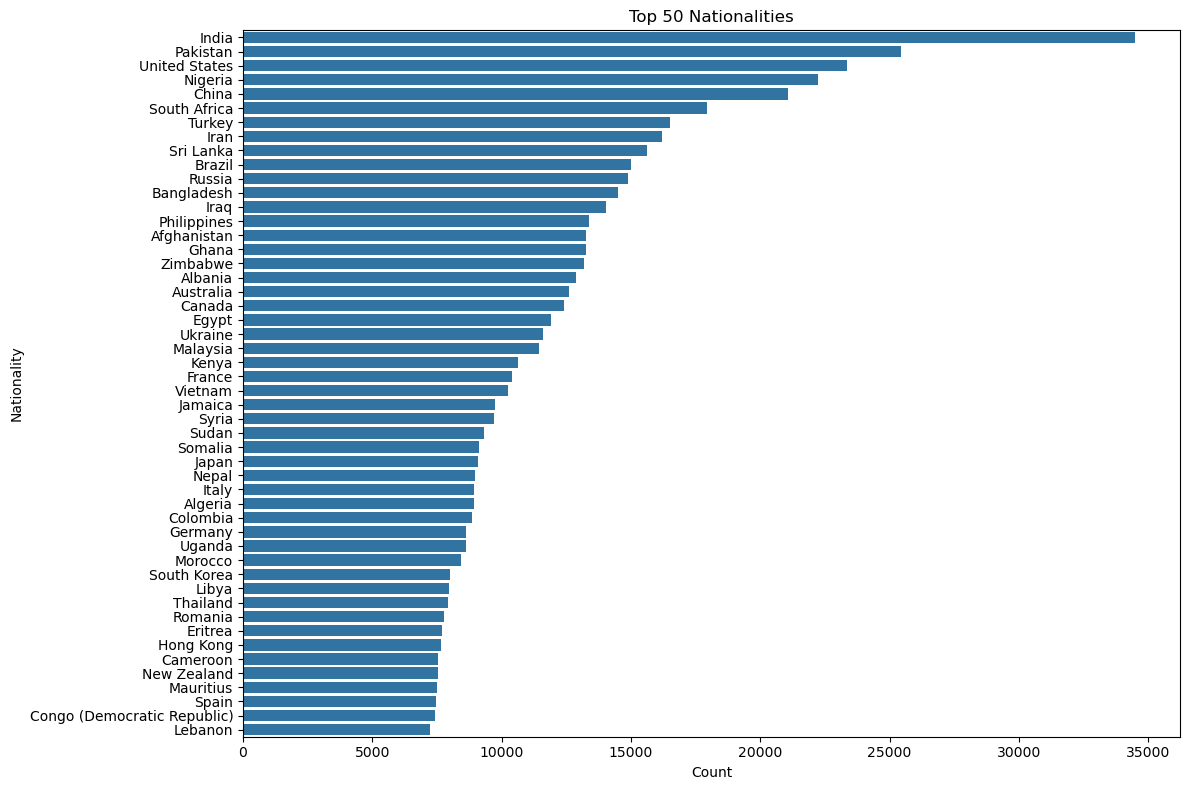

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index
filtered_df = df_combined[df_combined['Nationality'].isin(top_50_nationalities)]

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot for the top 50 nationalities
# Since we're focusing on 'Nationality' only, there's no need for 'hue'
sns.countplot(y='Nationality', data=filtered_df, order=filtered_df['Nationality'].value_counts().index)

# Set the title and labels
plt.title('Top 50 Nationalities')
plt.xlabel('Count')
plt.ylabel('Nationality')

# Rotate the y-axis labels for better readability if necessary
# plt.xticks(rotation=45) # This is for the x-axis labels, might not be needed

# Show the plot
plt.tight_layout()
plt.show()


In [60]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023401 entries, 584636 to 824045
Data columns (total 30 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1023401 non-null  int32  
 1   Quarter                   1023401 non-null  int32  
 2   Nationality               1023401 non-null  object 
 3   Region                    1023401 non-null  object 
 4   Return type group         237619 non-null   object 
 5   Return type               237619 non-null   object 
 6   Age                       1023401 non-null  object 
 7   Sex                       1023401 non-null  int32  
 8   Return destination group  237619 non-null   object 
 9   Number of returns         237619 non-null   float64
 10  Visa type group           308171 non-null   object 
 11  Applicant type            486999 non-null   object 
 12  Case outcome              1023401 non-null  object 
 13  Decisions                 41

<div id='Decisions_Grants'></div>

### Observation x: Decisions and Grants

In [61]:
df_combined['Decisions'].value_counts()

Decisions
1.0       128143
2.0        54835
3.0        32714
4.0        22425
5.0        16257
           ...  
2826.0         1
2045.0         1
4420.0         1
2509.0         1
4915.0         1
Name: count, Length: 4843, dtype: int64

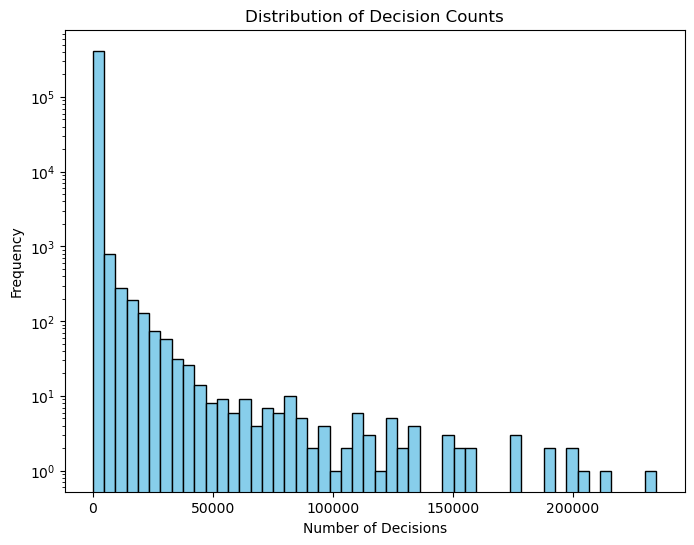

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['Decisions'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Decisions')
plt.ylabel('Frequency')
plt.title('Distribution of Decision Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.show()


In [63]:
df_combined['Decisions'] = pd.to_numeric(df_combined['Decisions'], errors='coerce').fillna(0)

In [64]:
df_combined['Decisions'].value_counts()

Decisions
0.0       605972
1.0       128143
2.0        54835
3.0        32714
4.0        22425
           ...  
2826.0         1
2045.0         1
4420.0         1
2509.0         1
4915.0         1
Name: count, Length: 4844, dtype: int64

In [65]:
df_combined['Grants'].value_counts()

Grants
1.0       90672
2.0       28543
3.0       15237
4.0       10008
5.0        7453
          ...  
662.0         1
926.0         1
1954.0        1
1330.0        1
554.0         1
Name: count, Length: 1039, dtype: int64

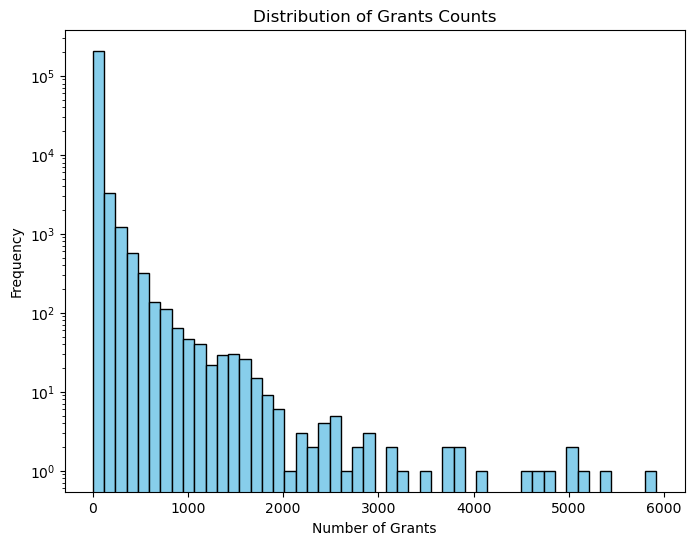

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Grants')
plt.ylabel('Frequency')
plt.title('Distribution of Grants Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.show()


In [67]:
df_combined['Grants'] = pd.to_numeric(df_combined['Grants'], errors='coerce').fillna(0)

# Optionally, convert the column to int if you know there are no decimal values and you want integer values
#df_combined['Grants'] = df_combined['Grants'].astype(int)

#Ask if this matters

Ok 'Grants' is fairly small in comparison to decisions. Let's graph both together to confirm:

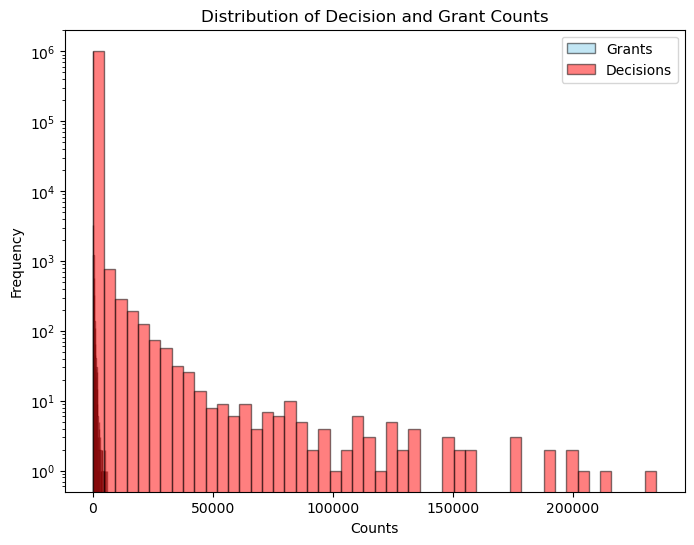

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Grants')
plt.hist(df_combined['Decisions'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Decisions')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Decision and Grant Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.legend()
plt.show()


OK it is very small. 

Let's investigate if both values are 0 and what the documents look like. Maybe we can clean some more useless rows.

In [69]:
# Filter the DataFrame
rows_with_zero_grants_and_decisions = df_combined[(df_combined['Grants'] == 0) & (df_combined['Decisions'] == 0)]


In [70]:
rows_with_zero_grants_and_decisions

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
827860,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,At Port,1021.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
827861,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,In Country,896.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
827862,2001,1,Albania,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,At Port,75.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
827863,2001,1,Albania,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,In Country,288.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
827864,2001,1,Algeria,Africa North,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,At Port,57.0,NaN,NaN,NaN,NaN,NaN,NaN,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069258,2023,3,Turkey,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,NaN,1.0,3545 - Sales accounts and business development...,Other Service Activities,Associate Professional and Technical Occupations,Business and Public Service Associate Professi...,"Sales, Marketing and Related Associate Profess...",Sales accounts and business development managers,Europe
1069260,2023,3,United States,America North,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,NaN,1.0,1115 - Chief executives and senior officials,Education,"Managers, Directors and Senior Officials",Corporate Managers and Directors,Chief Executives and Senior Officials,Chief executives and senior officials,America
1069262,2023,3,United States,America North,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,NaN,1.0,1115 - Chief executives and senior officials,Other Service Activities,"Managers, Directors and Senior Officials",Corporate Managers and Directors,Chief Executives and Senior Officials,Chief executives and senior officials,America
1069265,2023,3,United States,America North,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,NaN,1.0,1136 - Information technology and telecommunic...,Other Service Activities,"Managers, Directors and Senior Officials",Corporate Managers and Directors,Functional Managers and Directors,Information technology and telecommunications ...,America


OK We have to look at 'Applications', we forgot about that. This is probably another useful int column.

In [71]:
df_combined['Applications'].value_counts()

Applications
1.0      80209
2.0      22677
3.0      10785
4.0       6689
5.0       4608
         ...  
507.0        1
431.0        1
542.0        1
471.0        1
562.0        1
Name: count, Length: 755, dtype: int64

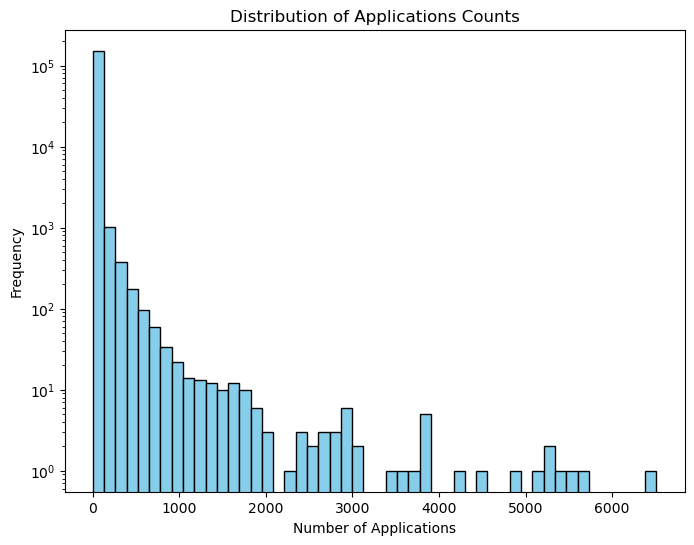

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['Applications'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Applications')
plt.ylabel('Frequency')
plt.title('Distribution of Applications Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.show()


In [73]:
df_combined['Applications'] = pd.to_numeric(df_combined['Applications'], errors='coerce').fillna(0)

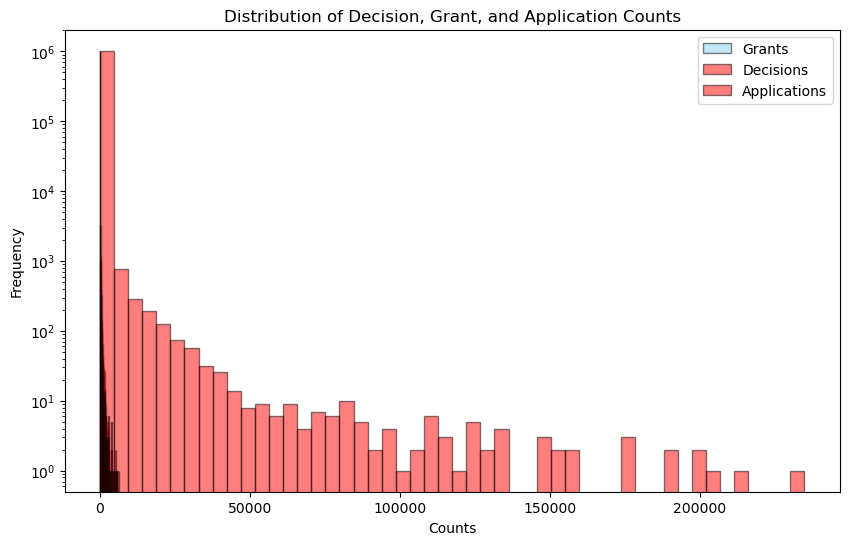

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Grants')
plt.hist(df_combined['Decisions'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Decisions')
plt.hist(df_combined['Applications'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Applications')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Decision, Grant, and Application Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.legend()
plt.show()

In [75]:
# Filter the DataFrame
rows_with_zero_grants_and_decisions = df_combined[(df_combined['Grants'] == 0) & (df_combined['Decisions'] == 0) & (df_combined['Applications'] == 0)]


In [76]:
rows_with_zero_grants_and_decisions.sample(10)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
137124,2014,3,Malawi,Africa Sub-Saharan,Voluntary return,Other verified returns,30 to 49,1,EU Member State,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Africa
225808,2022,3,Brazil,America Central and South,Voluntary return,Controlled returns,18 to 29,1,Home country,6.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,America
135395,2014,3,Afghanistan,Asia Central,Refused entry at port and subsequently departed,Departed from Juxtaposed controls,18 to 29,1,Other country,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
48221,2008,1,Vietnam,Asia South East,Voluntary return,Other verified returns,18 to 29,1,Home Country,5.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
150809,2015,3,Latvia,EU 8,Enforced return,Other returns from detention,18 to 29,1,Home country,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
58056,2008,4,Sri Lanka,Asia South,Refused entry at port and subsequently departed,Departed from Juxtaposed controls,18 to 29,2,EU Member State,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
208694,2020,1,Dominica,America Central and South,Refused entry at port and subsequently departed,Departed from UK Ports,30 to 49,2,Other country,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,America
37356,2007,2,United States,America North,Refused entry at port and subsequently departed,Departed from UK Ports,30 to 49,2,Home Country,44.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,America
70922,2009,4,Jamaica,America Central and South,Refused entry at port and subsequently departed,Departed from UK Ports,50 to 69,2,Home Country,4.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,America
1871,2004,1,Slovakia,EU 8,Enforced return,Enforced removals,30 to 49,2,Home country,6.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe


<div id='Applications'></div>

### Observation x: Applications

In [77]:
df_combined['Location of application'].value_counts()

Location of application
In Country    48050
At Port       21520
Name: count, dtype: int64

This is not neccesary for anything. Drop.

In [78]:
df_combined.drop(columns=['Location of application'], inplace=True)

In [79]:
df_combined['Application type group'].value_counts()

Application type group
Naturalisation    90227
Registration      42204
Name: count, dtype: int64

In [80]:
df_combined['Application type group'].value_counts()

Application type group
Naturalisation    90227
Registration      42204
Name: count, dtype: int64

Naturalisation doesn't add up. So let's keep them the way they are and anyalze later. Set others to unknown.

In [81]:
# First, ensure 'Application type' is a string to avoid any issues with mixed types
df_combined['Application type group'] = df_combined['Application type group'].astype(str)

# Then, standardize and categorize 'Application type'
known_types_group = [
    'Naturalisation',
    'Registration'
]

# Replace values not in known_types with 'Unknown'
df_combined.loc[:, 'Application type group'] = df_combined['Application type group'].apply(
    lambda x: x if x in known_types_group else 'Unknown'
)


In [82]:
df_combined['Application type group'].value_counts()

Application type group
Unknown           890970
Naturalisation     90227
Registration       42204
Name: count, dtype: int64

In [83]:
df_combined['Application type'].value_counts()

Application type
Naturalisation based on residence    51275
Naturalisation based on marriage     34862
Registration of minor children       23387
Registration on other grounds        15074
Name: count, dtype: int64

In [84]:
# First, ensure 'Application type' is a string to avoid any issues with mixed types
df_combined['Application type'] = df_combined['Application type'].astype(str)

# Then, standardize and categorize 'Application type'
known_types = [
    'Naturalisation based on residence',
    'Naturalisation based on marriage',
    'Registration of minor children',
    'Registration on other grounds'
]

# Replace values not in known_types with 'Unknown'
df_combined.loc[:, 'Application type'] = df_combined['Application type'].apply(
    lambda x: x if x in known_types else 'Unknown'
)


In [85]:
df_combined['Application type'].value_counts()

Application type
Unknown                              898803
Naturalisation based on residence     51275
Naturalisation based on marriage      34862
Registration of minor children        23387
Registration on other grounds         15074
Name: count, dtype: int64

Let's look into 'Applicant type', not to be confused with Application type!

In [86]:
df_combined['Applicant type'].value_counts()

Applicant type
Main Applicant        240539
All                   127997
Dependant             111627
Resettlement - N/A      3855
Main applicant          2981
Name: count, dtype: int64

In [87]:
# First, ensure 'Application type' is a string to avoid any issues with mixed types
df_combined['Applicant type'] = df_combined['Applicant type'].astype(str)

# Then, standardize and categorize 'Application type'
known_types_applicant = [
    'Main Applicant',
    'All',
    'Dependant',
    'Resettlement - N/A',
    'Main applicant'
]

# Replace values not in known_types with 'Unknown'
df_combined.loc[:, 'Applicant type'] = df_combined['Applicant type'].apply(
    lambda x: x if x in known_types_applicant else 'Unknown'
)


In [88]:
df_combined['Applicant type'].value_counts()

Applicant type
Unknown               536402
Main Applicant        240539
All                   127997
Dependant             111627
Resettlement - N/A      3855
Main applicant          2981
Name: count, dtype: int64

In [89]:
#df_combined['Total_Grants_Decisions_Applications'] = df_combined['Grants'] + df_combined['Decisions'] + df_combined['Applications']
#maybe do later

In [90]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.781438
Return type                 76.781438
Age                          0.000000
Sex                          0.000000
Return destination group    76.781438
Number of returns           76.781438
Visa type group             69.887561
Applicant type               0.000000
Case outcome                 0.000000
Decisions                    0.000000
Case type                   89.324028
Case outcome group           0.000000
UASC                        82.526107
Host Country                89.324028
Application type group       0.000000
Application type             0.000000
Grants                       0.000000
Applications                 0.000000
Occupation                  83.745179
Industry                    83.745179
Occ. major group            83.745179
Occ. sub-major group        83.745179
Occ. minor g

<div id='Return_Type'></div>

### Notable Observation x: Return Type

In [91]:
df_combined['Return type'].value_counts()
#acceptance / refusals - positive vs. negative wnv
#hypothesis testing top 50 

Return type
Departed from UK Ports               50605
Other verified returns               49411
Controlled returns                   35126
Departed from Juxtaposed controls    26261
Assisted returns                     16244
Enforced removals                    15657
Enforced removals from detention     15639
N/A - pre-2007                       14511
Other returns from detention          4998
Not available                         4285
Non-detained Enforced removals        3728
Non-detained enforced removals        1154
Name: count, dtype: int64

Some of these might be useful later. Let's map together some that are similar, as well as the unknowns, and set the rest to 0.

In [92]:
# Convert 'Return type' to string
df_combined['Return type'] = df_combined['Return type'].astype(str)

# Standardize 'Return type' column to lowercase and strip whitespace
df_combined['Return type'] = df_combined['Return type'].str.lower().str.strip()

# Replace variations with standard terms, including handling 'nan' strings
df_combined['Return type'] = df_combined['Return type'].replace({
    'n/a - pre-2007': 'Unknown',
    'not available': 'Unknown',
    'nan': 'Unknown'  # Explicitly handle 'nan' strings resulting from NaN conversion
})

# Since the direct replacement using loc[:] might lead to some confusion or inefficiency, the above method is streamlined


In [93]:
df_combined['Return type'].value_counts()

Return type
Unknown                              804578
departed from uk ports                50605
other verified returns                49411
controlled returns                    35126
departed from juxtaposed controls     26261
assisted returns                      16244
enforced removals                     15657
enforced removals from detention      15639
other returns from detention           4998
non-detained enforced removals         4882
Name: count, dtype: int64

In [94]:
#df_combined.loc[:, 'Return type'] = df_combined['Return type'].replace({'nan': 'Unknown'})

#remove later

In [95]:
df_combined['Return type group'].value_counts()

Return type group
Voluntary return                                   100781
Refused entry at port and subsequently departed     95662
Enforced return                                     41176
Name: count, dtype: int64

In [96]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Return type group'] = df_combined['Return type group'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Return type group'] = df_combined['Return type group'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Return type group'] = df_combined['Return type group'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})

# No need for further replacement since your categories are already distinct and there are no variations mentioned.


In [97]:
df_combined['Return type group'].value_counts()

Return type group
Unknown                                            785782
voluntary return                                   100781
refused entry at port and subsequently departed     95662
enforced return                                     41176
Name: count, dtype: int64

In [98]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group            0.000000
Return type                  0.000000
Age                          0.000000
Sex                          0.000000
Return destination group    76.781438
Number of returns           76.781438
Visa type group             69.887561
Applicant type               0.000000
Case outcome                 0.000000
Decisions                    0.000000
Case type                   89.324028
Case outcome group           0.000000
UASC                        82.526107
Host Country                89.324028
Application type group       0.000000
Application type             0.000000
Grants                       0.000000
Applications                 0.000000
Occupation                  83.745179
Industry                    83.745179
Occ. major group            83.745179
Occ. sub-major group        83.745179
Occ. minor g

In [99]:
df_combined['Return destination group'].value_counts()

Return destination group
Home country       94282
EU Member State    67244
Other country      51952
Home Country       24141
Name: count, dtype: int64

In [100]:
# Convert 'Return destination group' to string in case there are non-string types
df_combined['Return destination group'] = df_combined['Return destination group'].astype(str)

# Standardize 'Return destination group' column to lowercase and strip whitespace
df_combined['Return destination group'] = df_combined['Return destination group'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Return destination group'] = df_combined['Return destination group'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})

# Further unify the categories by ensuring 'home country' is consistently labeled (case differences handled by .lower())


In [101]:
df_combined['Return destination group'].value_counts()

Return destination group
Unknown            785782
home country       118423
eu member state     67244
other country       51952
Name: count, dtype: int64

In [102]:
df_combined['Number of returns'].value_counts()

Number of returns
1.0      123647
2.0       40135
3.0       19840
4.0       11592
5.0        7827
          ...  
303.0         1
355.0         1
199.0         1
205.0         1
346.0         1
Name: count, Length: 326, dtype: int64

In [103]:
df_combined['Number of returns'] = pd.to_numeric(df_combined['Number of returns'], errors='coerce').fillna(0).astype(int)

In [104]:
df_combined['Number of returns'].value_counts()

Number of returns
0      785782
1      123647
2       40135
3       19840
4       11592
        ...  
303         1
355         1
199         1
205         1
346         1
Name: count, Length: 327, dtype: int64

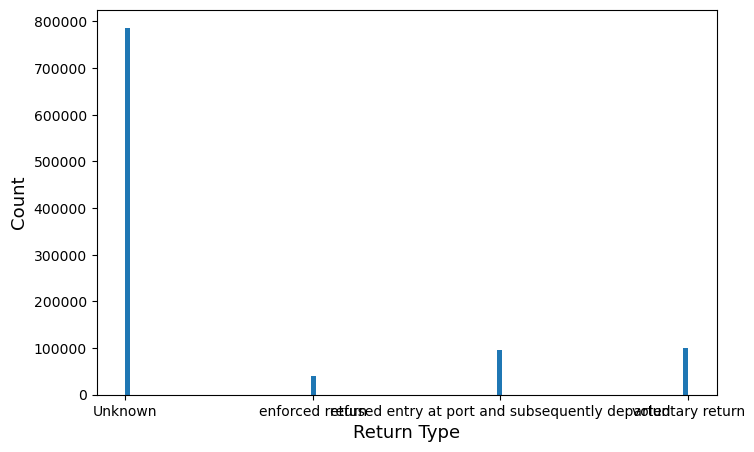

In [105]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Return type group'], bins = 100 )
#plt.yscale('log')
plt.ylabel("Count", size=13)
plt.xlabel("Return Type", size=13)
plt.show()

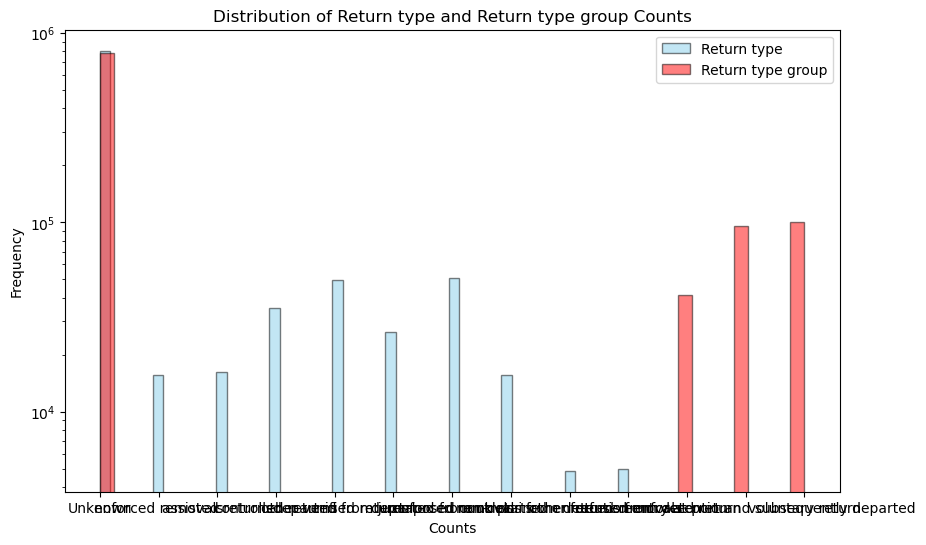

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Return type'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Return type')
plt.hist(df_combined['Return type group'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Return type group')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Return type and Return type group Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.legend()
plt.show()

<div id='Host_Country'></div>

### Observation x: Host Country

In [107]:
df_combined['Host Country'].value_counts()

Host Country
Asylum case - N/A                   105403
Resettlement (Pre-2021 Q1) - N/A      2215
Afghan resettlement case - N/A         516
Egypt                                  224
Jordan                                 174
Lebanon                                169
Turkey                                 163
Iraq                                   130
Kenya                                   45
Malaysia                                41
Syria                                   36
Iran                                    36
Thailand                                26
Indonesia                               20
Sri Lanka                               18
India                                   11
Pakistan                                 8
Niger                                    7
Burundi                                  7
Kyrgyzstan                               3
Gambia                                   2
Tunisia                                  1
Cayman Islands                           

Lets drop this. No value.

In [108]:
df_combined.drop(columns=['Host Country'], inplace=True)

In [109]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023401 entries, 584636 to 824045
Data columns (total 28 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1023401 non-null  int32  
 1   Quarter                   1023401 non-null  int32  
 2   Nationality               1023401 non-null  object 
 3   Region                    1023401 non-null  object 
 4   Return type group         1023401 non-null  object 
 5   Return type               1023401 non-null  object 
 6   Age                       1023401 non-null  object 
 7   Sex                       1023401 non-null  int32  
 8   Return destination group  1023401 non-null  object 
 9   Number of returns         1023401 non-null  int32  
 10  Visa type group           308171 non-null   object 
 11  Applicant type            1023401 non-null  object 
 12  Case outcome              1023401 non-null  object 
 13  Decisions                 10

<div id='Industry_Jobs'></div>

### Observation x: Industry and Jobs

In [110]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group            0.000000
Return type                  0.000000
Age                          0.000000
Sex                          0.000000
Return destination group     0.000000
Number of returns            0.000000
Visa type group             69.887561
Applicant type               0.000000
Case outcome                 0.000000
Decisions                    0.000000
Case type                   89.324028
Case outcome group           0.000000
UASC                        82.526107
Application type group       0.000000
Application type             0.000000
Grants                       0.000000
Applications                 0.000000
Occupation                  83.745179
Industry                    83.745179
Occ. major group            83.745179
Occ. sub-major group        83.745179
Occ. minor group            83.745179
Occ. unit gr

In [111]:
df_combined['Industry'].value_counts()

Industry
Professional, Scientific and Technical Activities                                        29404
Education                                                                                15969
Financial and Insurance Activities                                                       15438
Information and Communications                                                           14861
Human Health and Social Work Activities                                                  14834
Manufacturing                                                                            14553
Arts, Entertainment and Recreation                                                       12722
Administrative and Support Service Activities                                             7886
Wholesale and retail trade; repair of motor vehicles and motorcycles                      6984
Other Service Activities                                                                  6589
Construction                             

In [112]:
# Convert 'Industry' column to lowercase and then get the value counts
industry_value_counts = df_combined['Industry'].str.lower().value_counts()

# This will show the value counts for the 'Industry' column with all values converted to lowercase
print(industry_value_counts)


Industry
professional, scientific and technical activities                                        29404
education                                                                                15969
financial and insurance activities                                                       15438
information and communications                                                           14861
human health and social work activities                                                  14834
manufacturing                                                                            14553
arts, entertainment and recreation                                                       12722
administrative and support service activities                                             7886
wholesale and retail trade; repair of motor vehicles and motorcycles                      6984
other service activities                                                                  6589
construction                             

In [113]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Return type group'] = df_combined['Return type group'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Return type group'] = df_combined['Return type group'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Return type group'] = df_combined['Return type group'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})

# No need for further replacement since your categories are already distinct and there are no variations mentioned.


In [114]:
df_combined['Occupation'].value_counts()

Occupation
2136 - Programmers and software development professionals        7687
2423 - Management consultants and business analysts              6657
3545 - Sales accounts and business development managers          5369
3534 - Finance and investment analysts and advisers              4369
2135 - IT business analysts, architects and systems designers    4314
                                                                 ... 
9239 - Elementary cleaning occupations n.e.c.                       2
2441 - Public service administrative professionals                  2
6215 - Rail travel assistants                                       2
9259 - Elementary sales occupations n.e.c.                          1
9231 - Window cleaners                                              1
Name: count, Length: 324, dtype: int64

In [115]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Occupation'] = df_combined['Occupation'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Occupation'] = df_combined['Occupation'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Occupation'] = df_combined['Occupation'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})


In [116]:
df_combined['Occupation'].value_counts()

Occupation
Unknown                                                      857049
2136 - programmers and software development professionals      7687
2423 - management consultants and business analysts            6657
3545 - sales accounts and business development managers        5369
3534 - finance and investment analysts and advisers            4369
                                                              ...  
2422 - management accountants                                     2
3431 - journalists, newspaper and periodical editors              2
6215 - rail travel assistants                                     2
9231 - window cleaners                                            1
9259 - elementary sales occupations n.e.c.                        1
Name: count, Length: 325, dtype: int64

In [117]:
df_combined['Occ. sub-major group'].value_counts()

Occ. sub-major group
Science, Research, Engineering and Technology Professionals    40457
Business, Media and Public Service Professionals               28835
Business and Public Service Associate Professionals            25163
Corporate Managers and Directors                               18727
Culture, Media and Sports Occupations                          10802
Health Professionals                                           10401
Caring Personal Service Occupations                             5128
Textiles, Printing and Other Skilled Trades                     3610
Science, Engineering and Technology Associate Professionals     3361
Teaching and Educational Professionals                          3316
Health and Social Care Associate Professionals                  2524
Other Managers and Proprietors                                  2429
Administrative Occupations                                      2328
Skilled Metal, Electrical and Electronic Trades                 2324
Skilled Agric

In [118]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Occ. sub-major group'] = df_combined['Occ. sub-major group'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Occ. sub-major group'] = df_combined['Occ. sub-major group'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Occ. sub-major group'] = df_combined['Occ. sub-major group'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})


In [119]:
df_combined['Occ. sub-major group'].value_counts()

Occ. sub-major group
Unknown                                                        857049
science, research, engineering and technology professionals     40457
business, media and public service professionals                28835
business and public service associate professionals             25163
corporate managers and directors                                18727
culture, media and sports occupations                           10802
health professionals                                            10401
caring personal service occupations                              5128
textiles, printing and other skilled trades                      3610
science, engineering and technology associate professionals      3361
teaching and educational professionals                           3316
health and social care associate professionals                   2524
other managers and proprietors                                   2429
administrative occupations                                       2328

In [120]:
df_combined['Occ. minor group'].value_counts()

Occ. minor group
Information Technology and Telecommunications Professionals    18119
Business, Research and Administrative Professionals            15446
Engineering Professionals                                      13446
Sales, Marketing and Related Associate Professionals           11575
Business, Finance and Related Associate Professionals          10667
                                                               ...  
Conservation Associate Professionals                               2
Therapists                                                         2
Protective Service Officers                                        2
Business and Statistical Professionals                             2
Elementary Sales Occupations                                       1
Name: count, Length: 97, dtype: int64

In [121]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Occ. minor group'] = df_combined['Occ. minor group'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Occ. minor group'] = df_combined['Occ. minor group'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Occ. minor group'] = df_combined['Occ. minor group'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})


In [122]:
df_combined['Occ. minor group'].value_counts()

Occ. minor group
Unknown                                                        857049
information technology and telecommunications professionals     18119
business, research and administrative professionals             15446
engineering professionals                                       13446
sales, marketing and related associate professionals            11575
                                                                ...  
conservation associate professionals                                2
therapists                                                          2
protective service officers                                         2
business and statistical professionals                              2
elementary sales occupations                                        1
Name: count, Length: 98, dtype: int64

In [123]:
df_combined['Occ. unit group'].value_counts()

Occ. unit group
Programmers and software development professionals        7687
Management consultants and business analysts              6657
Sales accounts and business development managers          5369
Finance and investment analysts and advisers              4369
IT business analysts, architects and systems designers    4314
                                                          ... 
Management accountants                                       2
Security managers                                            2
Rail travel assistants                                       2
Window cleaners                                              1
Elementary sales occupations n.e.c.                          1
Name: count, Length: 320, dtype: int64

In [124]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Occ. unit group'] = df_combined['Occ. unit group'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Occ. unit group'] = df_combined['Occ. unit group'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Occ. unit group'] = df_combined['Occ. unit group'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})


In [125]:
df_combined['Occ. unit group'].value_counts()

Occ. unit group
Unknown                                               857049
programmers and software development professionals      7687
management consultants and business analysts            6657
sales accounts and business development managers        5369
finance and investment analysts and advisers            4369
                                                       ...  
public service administrative professionals                2
pharmacy and other dispensing assistants                   2
rail travel assistants                                     2
window cleaners                                            1
elementary sales occupations n.e.c.                        1
Name: count, Length: 321, dtype: int64

In [138]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group            0.000000
Return type                  0.000000
Age                          0.000000
Sex                          0.000000
Return destination group     0.000000
Number of returns            0.000000
Visa type group             69.887561
Applicant type               0.000000
Case outcome                 0.000000
Decisions                    0.000000
Case type                   89.324028
Case outcome group           0.000000
UASC                        82.526107
Application type group       0.000000
Application type             0.000000
Grants                       0.000000
Applications                 0.000000
Occupation                   0.000000
Industry                     0.000000
Occ. major group             0.000000
Occ. sub-major group         0.000000
Occ. minor group             0.000000
Occ. unit gr

In [127]:
df_combined['Industry'].value_counts()

Industry
Professional, Scientific and Technical Activities                                        29404
Education                                                                                15969
Financial and Insurance Activities                                                       15438
Information and Communications                                                           14861
Human Health and Social Work Activities                                                  14834
Manufacturing                                                                            14553
Arts, Entertainment and Recreation                                                       12722
Administrative and Support Service Activities                                             7886
Wholesale and retail trade; repair of motor vehicles and motorcycles                      6984
Other Service Activities                                                                  6589
Construction                             

In [128]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Industry'] = df_combined['Industry'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Industry'] = df_combined['Industry'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Industry'] = df_combined['Industry'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})


In [129]:
df_combined['Industry'].value_counts()

Industry
Unknown                                                                                  857049
professional, scientific and technical activities                                         29404
education                                                                                 15969
financial and insurance activities                                                        15438
information and communications                                                            14861
human health and social work activities                                                   14834
manufacturing                                                                             14553
arts, entertainment and recreation                                                        12722
administrative and support service activities                                              7886
wholesale and retail trade; repair of motor vehicles and motorcycles                       6984
other service activities       

In [130]:
df_combined['Occ. major group'].value_counts()

Occ. major group
Professional Occupations                            83017
Associate Professional and Technical Occupations    41974
Managers, Directors and Senior Officials            21156
Skilled Trades Occupations                           8263
Caring, Leisure and Other Service Occupations        5860
Administrative and Secretarial Occupations           3141
Elementary Occupations                               1434
Sales and Customer Service Occupations               1102
Process, Plant and Machine Operatives                 389
Personal Service Occupations                           10
Managers and Senior Officials                           6
Name: count, dtype: int64

In [131]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Occ. major group'] = df_combined['Occ. major group'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Occ. major group'] = df_combined['Occ. major group'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Occ. major group'] = df_combined['Occ. major group'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})


In [132]:
df_combined['Occ. major group'].value_counts()

Occ. major group
Unknown                                             857049
professional occupations                             83017
associate professional and technical occupations     41974
managers, directors and senior officials             21156
skilled trades occupations                            8263
caring, leisure and other service occupations         5860
administrative and secretarial occupations            3141
elementary occupations                                1434
sales and customer service occupations                1102
process, plant and machine operatives                  389
personal service occupations                            10
managers and senior officials                            6
Name: count, dtype: int64

<div id='Cases'></div>

### Observation x: Case Types & Visa Outcomes

In [143]:
df_combined['Visa type group'].value_counts()

Visa type group
Work                            94129
Study                           59859
Other                           59610
Family                          44565
Visitor                         32732
Dep. joining or accompanying    17276
Name: count, dtype: int64

In [146]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Visa type group'] = df_combined['Visa type group'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Visa type group'] = df_combined['Visa type group'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Visa type group'] = df_combined['Visa type group'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})


In [147]:
df_combined['Visa type group'].value_counts()

Visa type group
Unknown                         715230
work                             94129
study                            59859
other                            59610
family                           44565
visitor                          32732
dep. joining or accompanying     17276
Name: count, dtype: int64

Unaccompanied Asylum Seeking Children (UASC)

In [144]:
df_combined['UASC'].value_counts()

UASC
Non-UASC              142210
Total (pre-2006)       19543
UASC                   13220
Resettlement - N/A      3855
Name: count, dtype: int64

In [148]:
# Ensure all data is string for uniform processing
df_combined['UASC'] = df_combined['UASC'].astype(str).str.lower().str.strip()

# Replace specific values as per the requirements
df_combined['UASC'] = df_combined['UASC'].replace({
    'non-uasc': 'Registered Case',  # Convert 'Non-UASC' to 'Registered Case'
    'total (pre-2006)': 'Unknown',  # Convert 'Total (pre-2006)' to 'Unknown'
})

# Assuming 'UASC' remains unchanged, we only need to handle unspecified or other values.
# Since we already know all specific cases, we convert any other values not matched above to 'Unknown'.
# Note: 'UASC' and other known statuses should be explicitly listed to avoid being overwritten.
known_statuses = ['registered case', 'unknown', 'uasc']
df_combined['UASC'] = df_combined['UASC'].apply(
    lambda x: x if x in known_statuses else 'Unknown'
)


In [149]:
df_combined['UASC'].value_counts()

UASC
Unknown    1010181
uasc         13220
Name: count, dtype: int64

In [150]:
df_combined['Case type'].value_counts()

Case type
Asylum Case          105403
Resettlement Case      3855
Name: count, dtype: int64

In [151]:
# Convert 'Return type group' to string in case there are non-string types
df_combined['Case type'] = df_combined['Case type'].astype(str)

# Standardize 'Return type group' column to lowercase and strip whitespace
df_combined['Case type'] = df_combined['Case type'].str.lower().str.strip()

# Replace 'nan' with 'Unknown' explicitly to handle any missing or undefined values
df_combined['Case type'] = df_combined['Case type'].replace({
    'nan': 'Unknown'  # Handle 'nan' strings resulting from NaN conversion to 'Unknown'
})


In [152]:
df_combined['Case type'].value_counts()

Case type
Unknown              914143
asylum case          105403
resettlement case      3855
Name: count, dtype: int64

In [153]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                        0.0
Quarter                     0.0
Nationality                 0.0
Region                      0.0
Return type group           0.0
Return type                 0.0
Age                         0.0
Sex                         0.0
Return destination group    0.0
Number of returns           0.0
Visa type group             0.0
Applicant type              0.0
Case outcome                0.0
Decisions                   0.0
Case type                   0.0
Case outcome group          0.0
UASC                        0.0
Application type group      0.0
Application type            0.0
Grants                      0.0
Applications                0.0
Occupation                  0.0
Industry                    0.0
Occ. major group            0.0
Occ. sub-major group        0.0
Occ. minor group            0.0
Occ. unit group             0.0
General_Region              0.0
dtype: float64

In [157]:
df_combined.to_csv('C:/Users/patri/Downloads/df_combined_EDA1.csv', index=False)

<div id='EDA_Forward'></div>

### Observation x: Initial Conclusion for EDA and Foward

Initital insights

1) The Average_Score of ~8.4 suggests that the average hotel score seems high and it appears this hotel is well reviewed
2) The Reviewer_Score average of ~0.57 suggests a relatively positive sentiment
3) Additional Score is probably not useful
4) We can remove many columns from our dataframe that we won't be using moving forward, like all the locations
5) There is a significant amount of "No Negative" and "No Positive", so many reviewers didn't leave reviews
6) Reviews generally look to be short as well, hence the large right skew
7) Moving forward, in preprocessing, we can refine the dataframe even more by reducing the columns we don't need
8) As well, we can use parametres to remove useless data and optimize the dataframe even more
